In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as train_test_split
import sklearn.linear_model as lm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/fraudTrain.csv')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
368332,368332,2019-06-19 22:06:49,4956828990005111019,fraud_Gerhold LLC,home,5.94,Kenneth,Robinson,M,269 Sanchez Rapids,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,c98722c7f95a3ff4cd6fcfdca4652553,1340143609,39.970344,-74.180631,0
368333,368333,2019-06-19 22:07:00,4128730454058057622,"fraud_Nienow, Barrows and Romaguera",personal_care,13.13,Monique,Martin,F,68276 Matthew Springs,...,31.3833,-95.0619,43,"Engineer, production",1949-10-04,397799814bf520a9a10ca6a27e30c7a5,1340143620,31.273047,-95.171000,0
368334,368334,2019-06-19 22:08:35,4223708906367574214,fraud_Stiedemann Ltd,food_dining,72.78,Adam,Riddle,M,27718 Mason Bypass,...,39.0965,-84.6431,177,Exhibition designer,1974-05-30,6c1f22c67f6b348924922a0601d27c50,1340143715,38.257900,-84.197586,0
368335,368335,2019-06-19 22:09:02,4334230547694630,"fraud_Gutmann, McLaughlin and Wiza",home,2.10,Scott,Martin,M,7483 Navarro Flats,...,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,7b61a2213a7a3f2d41ae6fa06057a76f,1340143742,43.798266,-110.264194,0
368336,368336,2019-06-19 22:10:51,3552581383553463,fraud_Friesen Ltd,health_fitness,29.47,Jonathan,Castro,M,200 Christie Mills Apt. 307,...,35.1959,-83.8228,5354,Retail buyer,1965-04-13,1bb40c53dc2846d2a1d5435bd9bb79a2,1340143851,34.639351,-83.605239,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368337 entries, 0 to 368336
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             368337 non-null  int64  
 1   trans_date_trans_time  368337 non-null  object 
 2   cc_num                 368337 non-null  int64  
 3   merchant               368337 non-null  object 
 4   category               368337 non-null  object 
 5   amt                    368337 non-null  float64
 6   first                  368337 non-null  object 
 7   last                   368337 non-null  object 
 8   gender                 368337 non-null  object 
 9   street                 368337 non-null  object 
 10  city                   368337 non-null  object 
 11  state                  368337 non-null  object 
 12  zip                    368337 non-null  int64  
 13  lat                    368337 non-null  float64
 14  long                   368337 non-nu

In [ ]:
df.shape

(368337, 23)

In [ ]:
df.size

8471751

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df["dob"] = pd.to_datetime(df["dob"])
today = pd.Timestamp('today')
df['age'] = today.year - df['dob'].dt.year
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,36
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,46
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,62
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,57
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,38


In [ ]:
df.drop(columns=[ 'trans_num','merch_lat','merch_long','trans_date_trans_time','dob'],inplace=True)

In [ ]:
print("Normal Transactions count(%) :",(df['is_fraud'].value_counts()[0]/df.shape[0])*100,'%')
print("Fraud Transactions count(%) :",(df['is_fraud'].value_counts()[1]/df.shape[0])*100,'%')

Normal Transactions count(%) : 99.32290266793724 %
Fraud Transactions count(%) : 0.6770973320627578 %


In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,is_fraud,age
count,368337.000000,3.683370e+05,368337.000000,368337.000000,368337.000000,368337.000000,3.683370e+05,3.683370e+05,368337.000000,368337.000000
mean,184168.000000,4.168034e+17,70.576783,48790.543228,38.538789,-90.225719,8.962418e+04,1.333444e+09,0.006771,50.801310
std,106329.877389,1.308200e+18,159.484694,26920.589929,5.077971,13.778842,3.037300e+05,4.228969e+06,0.082007,17.361744
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,0.000000,19.000000
25%,92084.000000,1.800365e+14,9.660000,26041.000000,34.668900,-96.798000,7.430000e+02,1.330076e+09,0.000000,37.000000
50%,184168.000000,3.519607e+15,47.600000,48174.000000,39.354300,-87.476900,2.456000e+03,1.333705e+09,0.000000,49.000000
75%,276252.000000,4.642255e+15,83.310000,72042.000000,41.940400,-80.138100,2.047800e+04,1.337208e+09,0.000000,62.000000
max,368336.000000,4.992346e+18,25086.940000,99783.000000,66.693300,-67.950300,2.906700e+06,1.340144e+09,1.000000,100.000000


In [ ]:
def unique(columns):
  for col in columns:
    print('Column Name :',col)
    print('Unique Values :',int(df[f'{col}'].nunique()))
    print('--------------------------------------------------------------------')

In [ ]:
unique(list(df.columns))

Column Name : Unnamed: 0
Unique Values : 368337
--------------------------------------------------------------------
Column Name : cc_num
Unique Values : 936
--------------------------------------------------------------------
Column Name : merchant
Unique Values : 693
--------------------------------------------------------------------
Column Name : category
Unique Values : 14
--------------------------------------------------------------------
Column Name : amt
Unique Values : 33056
--------------------------------------------------------------------
Column Name : first
Unique Values : 341
--------------------------------------------------------------------
Column Name : last
Unique Values : 472
--------------------------------------------------------------------
Column Name : gender
Unique Values : 2
--------------------------------------------------------------------
Column Name : street
Unique Values : 936
--------------------------------------------------------------------
Column

In [ ]:
cat_var = ['merchant','category','first','last','gender','street','city','state','zip','job']

In [ ]:
encoder = LabelEncoder()
for col in cat_var:
  df[f'{col}'] = encoder.fit_transform(df[f'{col}'])


In [ ]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,is_fraud,age
0,0,2703186189652095,514,8,4.97,155,18,0,544,509,27,249,36.0788,-81.1781,3495,360,1325376018,0,36
1,1,630423337322,241,4,107.23,299,155,0,418,586,47,920,48.8878,-118.2105,149,416,1325376044,0,46
2,2,38859492057661,390,0,220.11,108,376,1,578,455,13,817,42.1808,-112.2620,4154,298,1325376051,0,62
3,3,3534093764340240,360,2,45.00,156,454,1,886,83,26,583,46.2306,-112.1138,1939,319,1325376076,0,57
4,4,375534208663984,297,9,41.96,325,147,1,403,211,45,217,38.4207,-79.4629,99,113,1325376186,0,38


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['is_fraud'] = imputer.fit_transform(df[['is_fraud']])

In [ ]:
x = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [ ]:

smote = SMOTE(
    sampling_strategy='auto',
    random_state = 0,
    k_neighbors = 3
)
x_res,y_res = smote.fit_resample(x,y)

In [ ]:
data = pd.concat([x_res,y_res],axis=1)
data.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,age,is_fraud
0,0,2703186189652095,514,8,4.97,155,18,0,544,509,27,249,36.0788,-81.1781,3495,360,1325376018,36,0
1,1,630423337322,241,4,107.23,299,155,0,418,586,47,920,48.8878,-118.2105,149,416,1325376044,46,0
2,2,38859492057661,390,0,220.11,108,376,1,578,455,13,817,42.1808,-112.2620,4154,298,1325376051,62,0
3,3,3534093764340240,360,2,45.00,156,454,1,886,83,26,583,46.2306,-112.1138,1939,319,1325376076,57,0
4,4,375534208663984,297,9,41.96,325,147,1,403,211,45,217,38.4207,-79.4629,99,113,1325376186,38,0


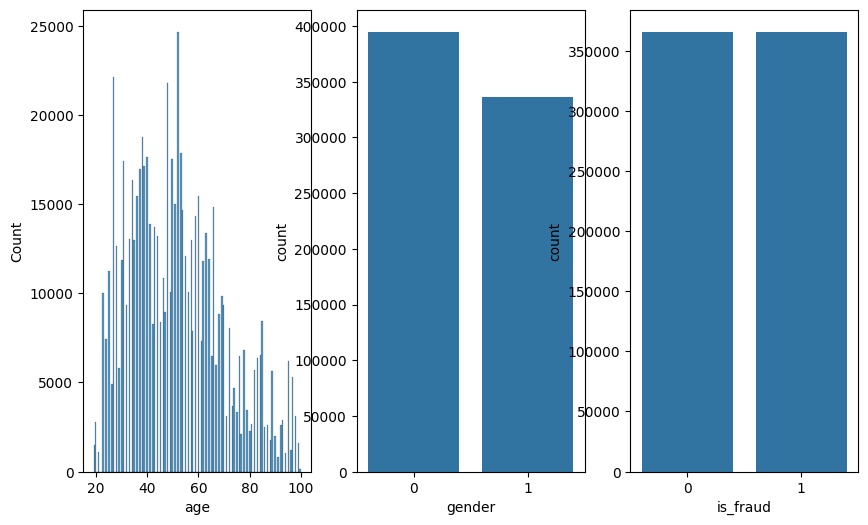

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10,6))
sns.histplot(data,x='age',ax=ax[0])
sns.countplot(data,x='gender',ax=ax[1])
sns.countplot(data,x='is_fraud',ax=ax[2])
plt.show()

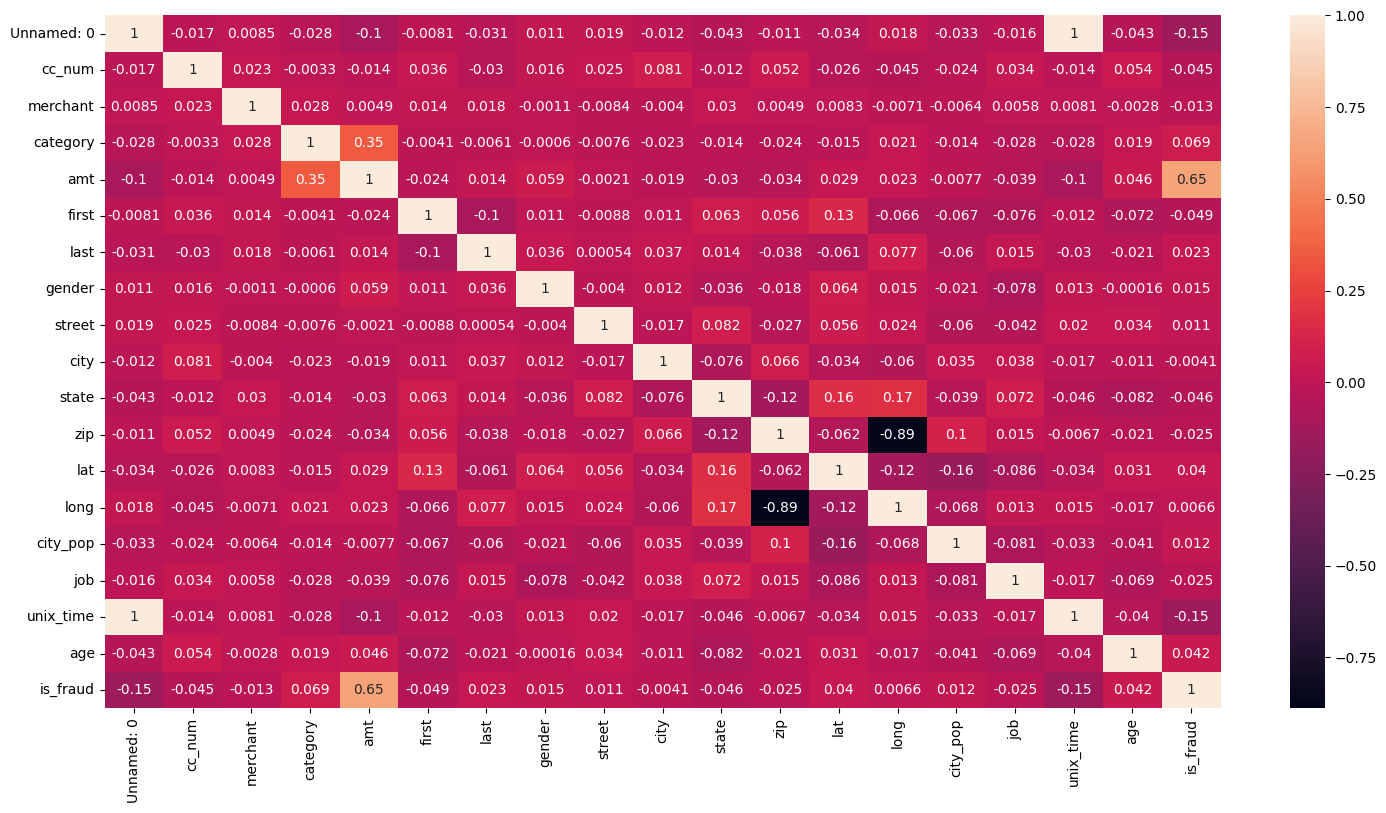

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
data.drop(columns=['cc_num','merchant','street','state','first','last','long','lat','job','unix_time','city_pop'],inplace=True)

In [ ]:
data.head()

,Unnamed: 0,category,amt,gender,city,zip,age,is_fraud
0,0,8,4.97,0,509,249,36,0
1,1,4,107.23,0,586,920,46,0
2,2,0,220.11,1,455,817,62,0
3,3,2,45.00,1,83,583,57,0
4,4,9,41.96,1,211,217,38,0


In [ ]:
x = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("Training sample size :",X_train.shape)
print("Test sample size :",X_test.shape)

Training sample size : (585348, 7)
Test sample size : (146338, 7)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
print("Training set accuracy :",model_lr.score(X_train,y_train))
print("Test set accuracy :",model_lr.score(X_test,y_test))

Training set accuracy : 0.8687806228089957
Test set accuracy : 0.8680862113736691


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


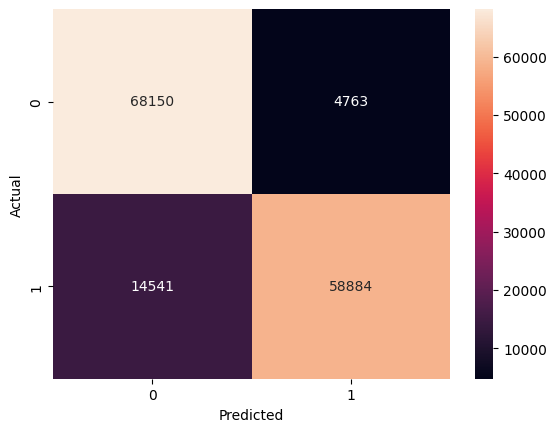

In [ ]:
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.93      0.88     72913
           1       0.93      0.80      0.86     73425

    accuracy                           0.87    146338
   macro avg       0.87      0.87      0.87    146338
weighted avg       0.87      0.87      0.87    146338



In [ ]:
model_DTC = DecisionTreeClassifier(max_depth=20)
model_DTC.fit(X_train,y_train)
print('Training set Score :',model_DTC.score(X_train,y_train))
print('Test set Score :',model_DTC.score(X_test,y_test))

Training set Score : 0.9838386737462159
Test set Score : 0.97507824351843


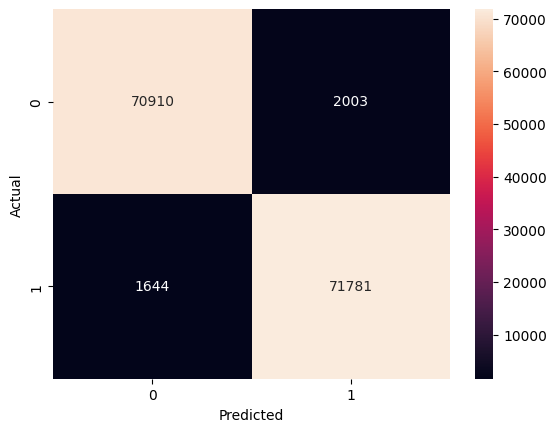

In [ ]:
y_pred = model_DTC.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     72913
           1       0.97      0.98      0.98     73425

    accuracy                           0.98    146338
   macro avg       0.98      0.98      0.98    146338
weighted avg       0.98      0.98      0.98    146338



In [ ]:
model_RFC = RandomForestClassifier(max_depth=20)
model_RFC.fit(X_train,y_train)
print('Training set Score :',model_RFC.score(X_train,y_train))
print('Test set Score :',model_RFC.score(X_test,y_test))

Training set Score : 0.9946630038882852
Test set Score : 0.9916494690374339


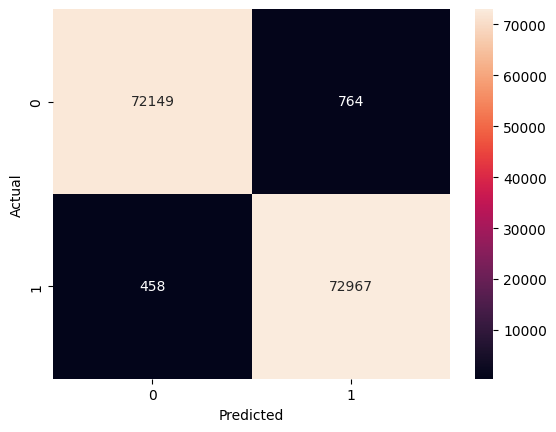

In [ ]:
y_pred = model_RFC.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     72913
           1       0.99      0.99      0.99     73425

    accuracy                           0.99    146338
   macro avg       0.99      0.99      0.99    146338
weighted avg       0.99      0.99      0.99    146338

